In [ ]:
import numpy as np



In [ ]:
import pandas as pd
diabetes_df=pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=diabetes_df.drop("Glucose",axis=1).values
y=diabetes_df["Glucose"].values

In [ ]:
X_bmi=X[:,4]
X_bmi

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1,  0. , 19.4, 24.2, 24.4, 33.7, 34.7,
       23. , 37.7, 46.8, 40.5, 41.5,  0. , 32.9, 25. , 25.4, 32.8, 29. ,
       32.5, 42.7, 19.6, 28.9, 32.9, 28.6, 43.4, 35.1, 32. , 24.7, 32.6,
       37.7, 43.2, 25. , 22.4,  0. , 29.3, 24.6, 48.8, 32.4, 36.6, 38.5,
       37.1, 26.5, 19.1, 32. , 46.7, 23.8, 24.7, 33.9, 31.6, 20.4, 28.7,
       49.7, 39. , 26.1, 22.5, 26.6, 39.6, 28.7, 22.4, 29.5, 34.3, 37.4,
       33.3, 34. , 31.2, 34. , 30.5, 31.2, 34. , 33.7, 28.2, 23.2, 53.2,
       34.2, 33.6, 26.8, 33.3, 55. , 42.9, 33.3, 34.5, 27.9, 29.7, 33.3,
       34.5, 38.3, 21.1, 33.8, 30.8, 28.7, 31.2, 36.9, 21.1, 39.5, 32.5,
       32.4, 32.8,  0. , 32.8, 30.5, 33.7, 27.3, 37

In [ ]:
print(X_bmi.shape)

(768,)


In [ ]:
X_bmi=X_bmi.reshape(-1,1)

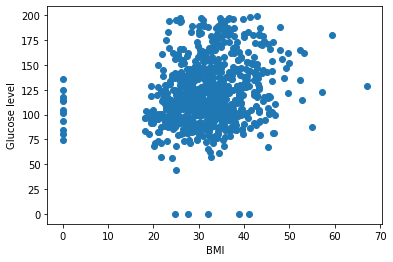

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi,y)
plt.xlabel("BMI")
plt.ylabel("Glucose level")
plt.show()

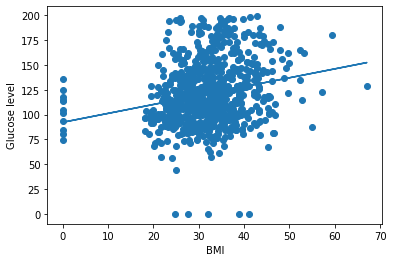

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_bmi,y)
predictions=reg.predict(X_bmi)
plt.scatter(X_bmi,y)
plt.plot(X_bmi,predictions)
plt.xlabel("BMI")
plt.ylabel("Glucose level")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
reg_all=LinearRegression()

In [ ]:
reg_all.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict=reg_all.predict(X_test)
print(len(X_test))
print(len(y_predict))

231
231


In [ ]:
reg_all.score(X_test,y_test)

0.28280468810375115

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
mean_squared_error(y_test,y_predict,squared=False)

26.341459582232265

In [ ]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
kf=KFold(n_splits=6,shuffle=True,random_state=42)

In [ ]:
reg=LinearRegression()

In [ ]:
cv_results=cross_val_score(reg,X,y,cv=kf)

In [ ]:
cv_results

array([0.26207548, 0.28228176, 0.41203082, 0.23785884, 0.41634629,
       0.30398869])

In [ ]:
np.mean(cv_results)

0.3190969786734479

In [ ]:
np.std(cv_results)

0.07015320610114183

In [ ]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:    
  ridge = Ridge(alpha=alpha)    
  ridge.fit(X_train, y_train)    
  y_pred = ridge.predict(X_test)    
  scores.append(ridge.score(X_test, y_test))
print(scores)

[0.2828466623222221, 0.28320633574804777, 0.2853000732200006, 0.26423984812668133, 0.19292424694100963]


In [ ]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  lasso_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test, y_test))

print(scores)


[0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


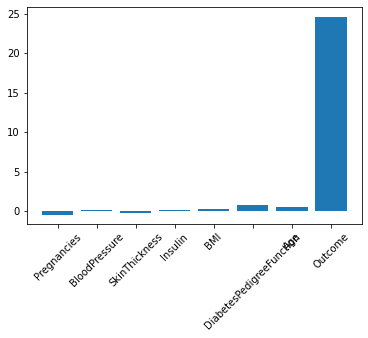

In [ ]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("Glucose", axis=1).values
y = diabetes_df["Glucose"].values
names = diabetes_df.drop("Glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()